In [499]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import seaborn as sns
%matplotlib inline

In [500]:
data = pd.read_excel('Признаки НИР (2).xlsx', sheet_name='2019', index_col=0)
data = data.dropna(axis='columns')
data = data.drop(data.columns[[0,1,2,3,4,5,6,7,8,9,]], axis = 1)

In [501]:
data = data.drop(data.columns[[4,5,6,14,41,93,94]], axis = 1)

In [490]:
#data = data.drop(data.columns[[3,5,8,9,11,12,13,14,15,20,39,40,41,42,51,56,57,63,64,65,66,67,68]], axis = 1)

In [491]:
data = data.drop(data.columns[[3,5,8,9,11,12,13,14,15,16,17,21,22,24,25,28,29,34,42,43,46,56,57,64,65,66,67,68,73,]], axis = 1)

In [465]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 88 columns):
 #   Column                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                 --------------  -----  
 0   Соотношение мужчин и женщин (на 1000 мужчин приходится женщин)                                                                                                                                                                         85 non-null     int64  
 1   Возрастной состав населения: младше трудоспособного (в процентах от общей численности 

In [470]:
#y = [7,9,14,28,33, 35, 44, 54, 55,70,71, 73, 75, 77, 79,81,82,85,86,19, 37,58,62,64]
#data = data.iloc[:,y]

In [285]:
#data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 58 columns):
 #   Column                                                                                                                                                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                 --------------  -----  
 0   Возрастной состав населения: младше трудоспособного (в процентах от общей численности населения)                                                                                                                                      85 non-null     float64
 1   Возрастной состав населения: трудоспособного возраста (в процентах от общей численност

In [286]:
#data.to_excel('X:/nelinmod.xlsx')

In [492]:
#стандартизация
index = data.index
columns = data.columns
scaled = (data - data.mean(axis=0)) / data.std()
scaled_data = pd.DataFrame(scaled, columns=columns, index=index) 
scaled_data.head()

,Соотношение мужчин и женщин (на 1000 мужчин приходится женщин),Возрастной состав населения: младше трудоспособного (в процентах от общей численности населения),Возрастной состав населения: трудоспособного возраста (в процентах от общей численности населения),Соотношение браков и разводов (на 1000 браков приходится разводов),"Среднедушевые доходы населения (в месяц), руб.","Уровень безработицы населения в возрасте 15-72 лет, %",Численность государственных гражданских (муниципальных) служащих государственных органов и органов местного самоуправления,"Среднемесячная номинальная начисленная заработная плата работников организаций, руб.",Численность населения с денежными доходами ниже величины прожиточного минимума,"Потребительские расходы в среднем на душу населения (в месяц), руб.",...,Использование цифровых технологий в организациях,Численность активных абонентов фиксированного и мобильного широкополосного доступа к сети Интернет на 100 человек населения,"Кол-во преступлений по ст, 290 (Получение взятки), на 1000 чел населения","Кол-во преступлений по ст, 290 (Дача взятки) на 1000 чел населения","Кол-во преступлений экономической направленности, на 1000 чел населения","Количество преступлений террористического характера, уголовные дела о которых направлены в суд, на 1000 чел населения","Количество преступлений экстремистского характера, уголовные дела о которых направлены в суд, на 1000 чел населения","Кол-во преступлений (наркотики), на 1000 чел населения","Предварительно расследовано преступлений, совершенных в состоянии алкогольного опьянения, на 1000 чел населения","Выявлено лиц, совершивших преступления в состоянии алкогольного опьянения, на 1000 чел населения"
Наименование,,,,,,,,,,,,,,,,,,,,,
Алтайский край,0.475895,-0.143993,-0.990647,0.710646,-0.582304,0.015839,-0.411994,-0.788729,0.650559,-0.792329,...,0.542359,-0.178786,0.222753,-0.713198,-1.283954,-0.674023,-0.689118,0.506480,1.076810,1.061041
Амурская область,-0.626788,0.195991,0.529985,0.608582,0.087669,-0.101229,0.316822,0.246055,0.280611,0.255729,...,0.337468,-0.367567,-0.976350,-0.105982,-0.850300,-0.480418,0.078034,3.026088,0.999298,1.019386
Архангельская область без автономного округа,-0.123810,-0.257321,-0.658008,0.259863,0.128438,0.132907,0.365480,0.525262,-0.303518,0.603264,...,0.300215,0.560605,-0.293228,0.963229,0.749406,-0.674023,-0.134127,-1.128444,0.749702,0.636183
Астраханская область,-0.375299,0.280987,-0.325370,0.174810,-0.508347,0.542644,-0.617866,-0.352146,0.241669,-0.373781,...,0.449227,-0.493421,0.384152,-0.372839,0.904103,0.846334,-0.488306,0.865969,-0.105061,-0.133935
Белгородская область,0.417859,-0.738966,-0.182811,-0.344016,0.019578,-0.540234,-0.516450,-0.431505,-1.257595,0.212239,...,0.914889,0.057189,-0.001390,-0.714976,-1.048201,-0.377804,-0.689118,-0.848796,-0.880502,-0.871742


In [493]:
correlation = scaled_data.corr() #корреляционная матрица
#correlation

In [494]:
# проверка гипотезы о незначимости корреляционной матрицы
eigenvalues, eigenvector = np.linalg.eig(correlation)
couple_lst = []
for i in range(len(eigenvalues)):
    couple_lst.append((eigenvalues[i], eigenvector[:, i]))

lst = sorted(couple_lst, key=lambda x: x[0], reverse=True)
eigenvalues_sorted = sorted(eigenvalues, reverse=True)

In [495]:
eigenvalues_sorted

[12.529955970695156,
 8.722811896403373,
 5.783800062927773,
 3.3273567491632177,
 2.5824519287754595,
 2.2854521156513625,
 2.089832328784835,
 1.9415456558121644,
 1.6593510982238455,
 1.6037978719817374,
 1.550361449189479,
 1.2020214710416501,
 1.142565573541867,
 1.0737442380629083,
 0.9447780476979349,
 0.925574066926089,
 0.8582076886559826,
 0.761833235942876,
 0.704526210313942,
 0.6489715248751329,
 0.6280233102734113,
 0.5595959500642023,
 0.5172600226781873,
 0.44787913715227085,
 0.43678424160485024,
 0.3965183511569096,
 0.38320292955836055,
 0.3300241940042092,
 0.32075223817551335,
 0.2865663263363295,
 0.26582756118182393,
 0.2192010041748947,
 0.2117693056311656,
 0.1811780589409691,
 0.1663870892084392,
 0.1525504861281516,
 0.1442959274407024,
 0.13682964950141405,
 0.12496151362053523,
 0.10259175371319024,
 0.08862225734423931,
 0.08438637808440173,
 0.0758734939345376,
 0.07119507855152682,
 0.05993290731525219,
 0.057120696847251635,
 0.03758816220447804,
 0.034

In [496]:
# Критерий Кайзера
print("Критерий Кайзера: ", len(eigenvalues[eigenvalues > 1]))

Критерий Кайзера:  14


In [497]:
features = scaled_data.columns
f_len = len(features)

In [498]:
# оценка уровня информативности
lmbd = 0

'''for i in range(pc):
    lmbd = lmbd + eigenvalues_sorted[i]

I = lmbd * 100 / f_len'''

for i in range(14):
    lmbd = lmbd + eigenvalues_sorted[i]
    I = lmbd * 100 / f_len
    print(f"Оценка информативности для {i + 1} главных компонент:")
    print('I(x) = {:.3f}%'.format(I))


Оценка информативности для 1 главных компонент:
I(x) = 21.237%
Оценка информативности для 2 главных компонент:
I(x) = 36.022%
Оценка информативности для 3 главных компонент:
I(x) = 45.825%
Оценка информативности для 4 главных компонент:
I(x) = 51.464%
Оценка информативности для 5 главных компонент:
I(x) = 55.841%
Оценка информативности для 6 главных компонент:
I(x) = 59.715%
Оценка информативности для 7 главных компонент:
I(x) = 63.257%
Оценка информативности для 8 главных компонент:
I(x) = 66.548%
Оценка информативности для 9 главных компонент:
I(x) = 69.360%
Оценка информативности для 10 главных компонент:
I(x) = 72.079%
Оценка информативности для 11 главных компонент:
I(x) = 74.706%
Оценка информативности для 12 главных компонент:
I(x) = 76.744%
Оценка информативности для 13 главных компонент:
I(x) = 78.680%
Оценка информативности для 14 главных компонент:
I(x) = 80.500%


In [478]:
# матрица дисперсий
dispersion = np.empty(len(eigenvalues))
eigenvalues_sum = eigenvalues.sum()

for i in range(dispersion.shape[0]):
    dispersion[i] = eigenvalues[i] / eigenvalues_sum 

var = map(lambda x: x / eigenvalues_sum, eigenvalues_sorted)
df = pd.DataFrame(
    zip(
        eigenvalues_sorted,
        range(1, len(eigenvalues_sorted) + 1),
        map(lambda x: round(x / eigenvalues_sum, 2), eigenvalues_sorted)
    ),
    columns=["eig", "number", "variance_share"]
)
#df

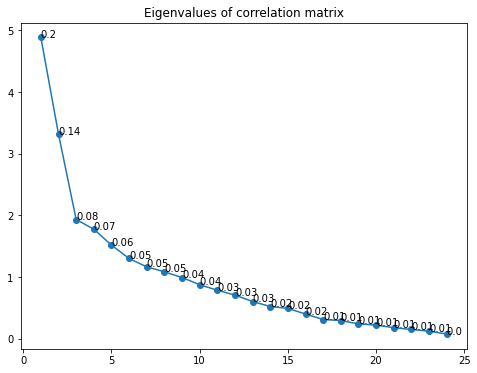

In [479]:
plt.figure(figsize=(8, 6))
plt.title('Eigenvalues of correlation matrix')
plt.plot(df['number'], df['eig'], marker='o')
ax = plt.gca()
df.apply(lambda x: ax.annotate(x['variance_share'], (x['number'], x['eig'])), axis=1)
plt.show()

In [480]:
# Коэффициенты линейного преобразования центрировано-нормированных исходных признаков 
vector_df = pd.DataFrame(eigenvector, columns=['Factor_' + str(i + 1) for i in range(f_len)], index=features)
#vector_df

In [481]:
# построение главных компонент
u = pd.DataFrame(
    data=np.array([couple_lst[i][1] for i in range(f_len)]).T,
    columns=['Factor_' + str(i + 1) for i in range(f_len)],
    index=features
)
#u

In [482]:
# матрица нагрузок
A = u @ np.diag(np.sqrt(eigenvalues_sorted))
A.index = features
#A.iloc[:,:14].head()
#A.to_excel('X:/Матрица_нагрузок2.xlsx')

In [486]:
comp = pd.DataFrame(columns = ['name', 'coef'])
# j - номер компоненты, начиная с 0
j=3
for i in range (0,f_len):
    feat=[]
    if A[j][i]>0.3 or A[j][i]<-0.3:
        data = {'name': [A.index[i]], 'coef': [A[j][i]]}
        new_row = pd.DataFrame(data)
        comp = pd.concat([comp, new_row])
comp = comp.assign(abs_coef = abs(comp['coef']))
#print(len(comp))
comp.sort_values(by = ['abs_coef'], ascending=False).iloc[ :,:2]

,name,coef
0,"Реальные денежные доходы населения, в % к пред...",0.50967
0,Сброс загрязненных сточных вод в поверхностные...,-0.50123
0,Средства (вклады) юридических и физических лиц...,0.470107
0,Охват населения теле- и радиовещанием(в % от о...,0.45586
0,"Кол-во преступлений (наркотики), на 1000 чел н...",0.44535
0,Удельный вес убыточных организаций(в % от обще...,-0.378306
0,"Численность студентов, обучающихся по программ...",0.328723
0,Число спортивных сооружений Плоскостные спорти...,0.315445


In [444]:
# Матрица индивидуальных значений главных компонент
pc=10
F = (np.linalg.inv(A.T @ A) @ A.T @ scaled_data.T).T
F.columns = ['Factor_' + str(i + 1) for i in range(f_len)]
#F = F.sort_values("Factor_1", ascending=False)
F = F.iloc[:, :pc] # Берем первые pc главных компонент
F[:18]

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10
Наименование,,,,,,,,,,
Алтайский край,-0.548711,0.210980,0.638235,0.464831,1.285226,0.829316,0.414789,0.229110,0.741731,-0.005378
Амурская область,0.124043,0.831715,0.471779,1.268258,0.438875,0.239580,-0.327103,-0.131595,-0.216303,1.132975
Архангельская область без автономного округа,0.485407,0.377337,0.546472,0.439001,0.749380,-0.093473,0.810227,1.135616,-1.506940,-1.047367
Астраханская область,-0.452463,0.346732,-0.315568,0.584166,-0.324614,-0.908947,-0.439302,0.394705,0.047941,-0.250244
Белгородская область,-0.061622,-1.314621,0.301857,-1.186140,-0.292334,0.605783,-0.293497,-0.787973,0.561172,0.838785
Брянская область,-0.355100,-0.423023,0.526853,-0.317389,-0.275191,0.238128,-1.201635,0.625478,-0.970567,-0.133022
Владимирская область,-0.195232,-0.672664,1.050552,-0.589302,0.174088,-0.335142,0.196231,-1.320296,-0.159046,-0.015428
Волгоградская область,-0.304204,-0.163328,0.012527,-0.063455,0.010418,-0.037636,0.100391,0.534593,-0.081387,-0.351990
Вологодская область,0.029228,-0.171740,0.914242,-0.726295,1.015307,-0.096629,0.886860,-1.080563,0.143358,-0.428978


In [399]:
F.to_excel('X:/F4.xlsx')

In [445]:
y = pd.read_excel('X:/Учеба/4 курс/8 сем/нир/Кластеризации/МГК/Признаки НИР (2).xlsx', sheet_name='2019', index_col=0)
y = y.iloc[:, 3]
y.head()

Наименование
Алтайский край                                  26.86
Амурская область                                28.25
Архангельская область без автономного округа    33.38
Астраханская область                            12.70
Белгородская область                            17.42
Name: Результаты голосования по поправкам в Конституцию, % против, dtype: float64

In [446]:
F['const'] = y.values

In [447]:
F.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, Алтайский край to Ярославская область
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Factor_1   85 non-null     float64
 1   Factor_2   85 non-null     float64
 2   Factor_3   85 non-null     float64
 3   Factor_4   85 non-null     float64
 4   Factor_5   85 non-null     float64
 5   Factor_6   85 non-null     float64
 6   Factor_7   85 non-null     float64
 7   Factor_8   85 non-null     float64
 8   Factor_9   85 non-null     float64
 9   Factor_10  85 non-null     float64
 10  const      85 non-null     float64
dtypes: float64(11)
memory usage: 8.0+ KB


In [452]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols("const ~ Factor_1 + Factor_2 + Factor_3 + Factor_4 + Factor_5 + Factor_6", F).fit()
model.summary()

#anova = sm.stats.anova_lm(model, typ=1)
#print(anova)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  const   R-squared:                       0.363
Model:                            OLS   Adj. R-squared:                  0.314
Method:                 Least Squares   F-statistic:                     7.405
Date:                Fri, 03 Jun 2022   Prob (F-statistic):           2.73e-06
Time:                        04:10:39   Log-Likelihood:                -290.97
No. Observations:                  85   AIC:                             595.9
Df Residuals:                      78   BIC:                             613.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     23.0472      0.840     27.430      0.000      21.374      24.720
Factor_1       3.9919      0.845      4.723      0.000       2.309       5.675
Factor_2       1.4920      0.845      1.765      0.081      -0.191       3.175
Factor_3       2.8055      0.845      3.319      0.001       1.123       4.488
Factor_4       1.7382      0.845      2.057      0.043       0.056       3.421
Factor_5       1.6258      0.845      1.924      0.058      -0.057       3.308
Factor_6      -0.2030      0.845     -0.240      0.811      -1.886       1.480
==============================================================================
Omnibus:                        3.242   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.198   Jarque-Bera (JB):                2.503
Skew:                          -0.353   Prob(JB):                        0.286
Kurtosis:                       3.457   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""